In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as shc


In [2]:
df=pd.read_csv("Downloads\Segmentation.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.rename({'Annual Income (k$)':'income','Spending Score (1-100)':'score'},axis=1,inplace=True)

In [9]:
df

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Exploratory data analysis

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


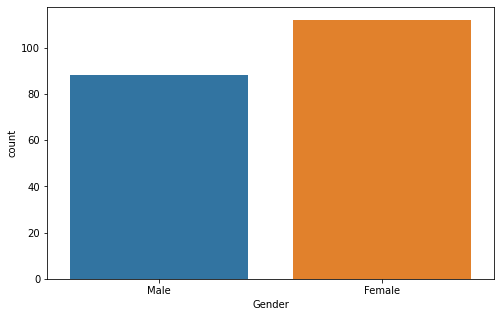

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(df.Gender)
plt.show()

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


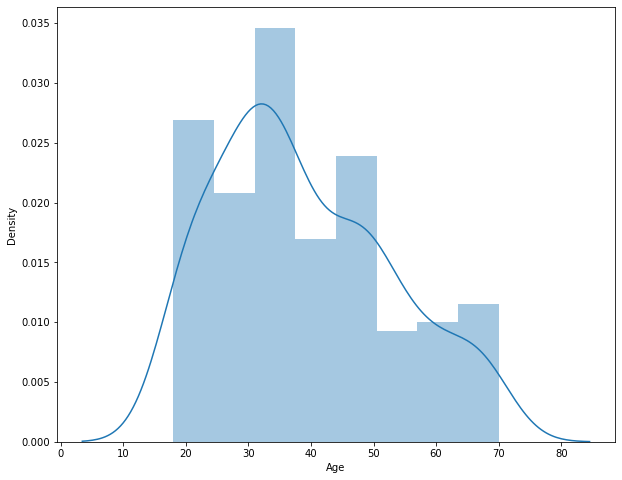

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


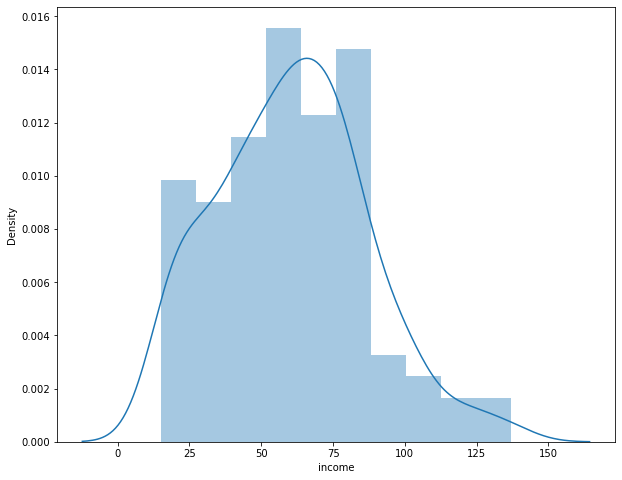

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


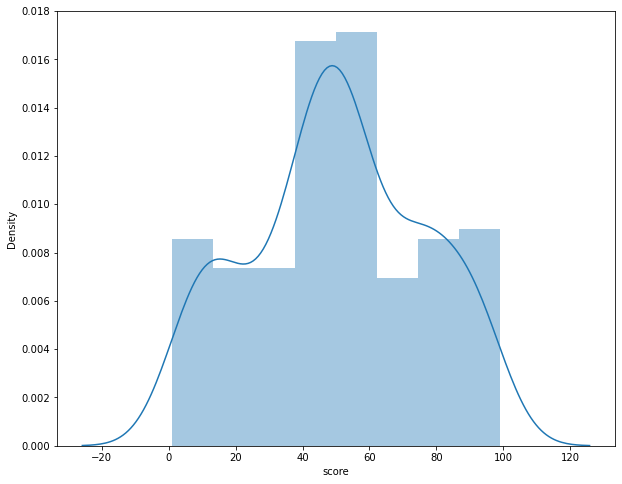

In [11]:
for x in df.iloc[:,2:5]:
    plt.figure(figsize=(10,8))
    sns.distplot(df[x])
    plt.show()



In [12]:
df.corr()

,CustomerID,Age,income,score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
income,0.977548,-0.012398,1.000000,0.009903
score,0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

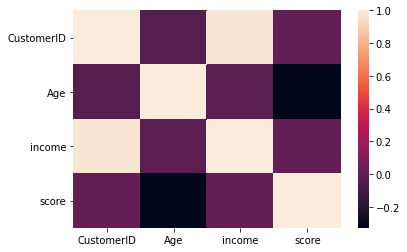

In [13]:
sns.heatmap(df.corr())

# outliers

In [14]:
outliers=df.select_dtypes(exclude='object')
for i in outliers:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    
    iqr=q1-q3
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    print("iqr of",i,"=",iqr)
    print("upperbound",i,"=",ub)
    print("lowerbound",i,"=",lb)
    print('number of outliers in',i,'=',(df.shape[0]-df[(df[i]<ub)& (df[i]>lb)].shape[0]))
    
       
    

iqr of CustomerID = -99.5
upperbound CustomerID = 1.0
lowerbound CustomerID = 200.0
number of outliers in CustomerID = 200
iqr of Age = -20.25
upperbound Age = 18.625
lowerbound Age = 59.125
number of outliers in Age = 200
iqr of income = -36.5
upperbound income = 23.25
lowerbound income = 96.25
number of outliers in income = 200
iqr of score = -38.25
upperbound score = 15.625
lowerbound score = 92.125
number of outliers in score = 200


# feature engineering

In [15]:
# one hot encoding
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [16]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [17]:
df.drop('CustomerID',axis=1,inplace=True)

In [18]:
df.head()

,Gender,Age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [19]:
# segmentation

x=df.iloc[:,1:4]

In [20]:
km=KMeans(n_clusters=3)
km.fit(x)

KMeans(n_clusters=3)

In [21]:
cluster=km.predict(x)

In [22]:
df['cluster']=cluster

In [23]:
df

,Gender,Age,income,score,cluster
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,1
3,0,23,16,77,1
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,0
197,1,32,126,74,2
198,1,32,137,18,0


In [24]:
k_range=range(1,10)
sme=[]
for k in k_range:
    km1=KMeans(n_clusters=k,init='k-means++')
    fit=km1.fit(x)
    sme.append(km1.inertia_)

    

C:\Users\GUDA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


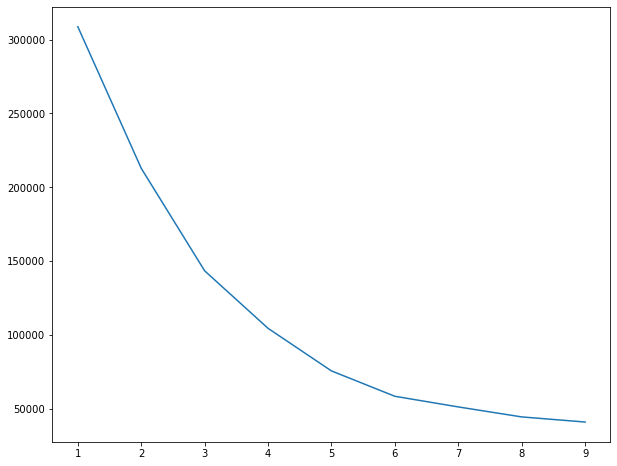

In [25]:
plt.figure(figsize=(10,8))
plt.plot(k_range,sme)
plt.show()

In [26]:
km1.cluster_centers_

array([[ 41.96      ,  79.64      ,  15.4       ],
       [ 32.78571429,  78.03571429,  81.89285714],
       [ 56.15555556,  53.37777778,  49.08888889],
       [ 27.06666667,  38.6       ,  52.13333333],
       [ 32.45454545, 108.18181818,  82.72727273],
       [ 27.        ,  61.96296296,  47.77777778],
       [ 41.        , 109.7       ,  22.        ],
       [ 46.15789474,  26.10526316,  17.42105263],
       [ 24.85      ,  24.95      ,  81.        ]])

In [27]:
km1=KMeans(n_clusters=3,init='k-means++',max_iter=20,random_state=3)
km1.fit(x)

KMeans(max_iter=20, n_clusters=3, random_state=3)

In [28]:
clusters=km1.predict(x)


In [29]:
df['clusters']=clusters

In [30]:
df.head()

,Gender,Age,income,score,cluster,clusters
0,1,19,15,39,1,2
1,1,21,15,81,1,2
2,0,20,16,6,1,2
3,0,23,16,77,1,2
4,0,31,17,40,1,2


C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


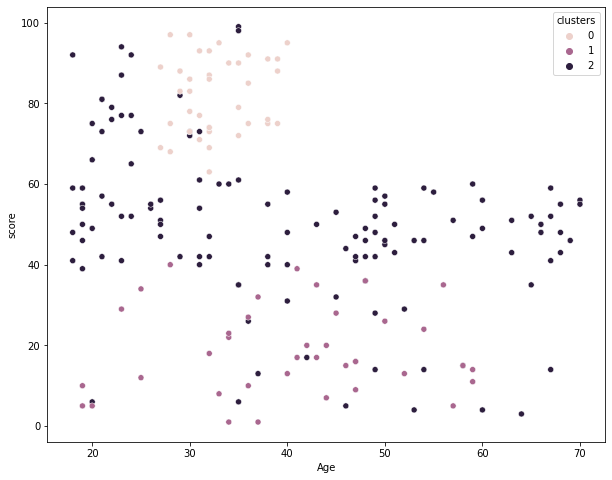

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot('Age','score',hue='clusters',data=df)
plt.show()

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


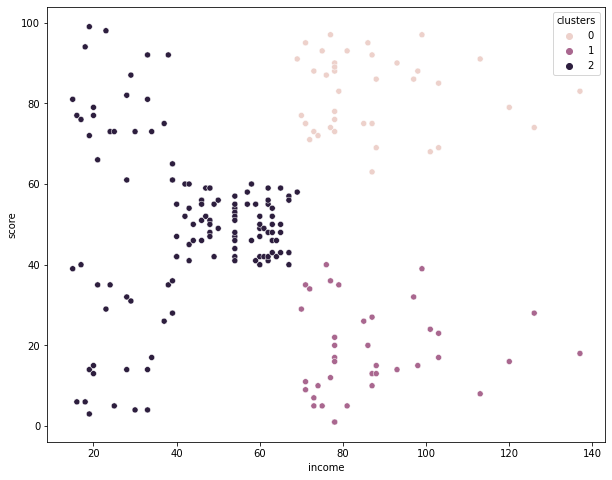

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot('income','score',hue='clusters',data=df)
plt.show()

In [33]:
km2=KMeans(n_clusters=5,init='k-means++',max_iter=20,random_state=3)
km2.fit(x)

KMeans(max_iter=20, n_clusters=5, random_state=3)

In [34]:
km2.predict(x)

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 1, 3, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [35]:
df['1clusters']=km2.labels_

In [36]:
df

,Gender,Age,income,score,cluster,clusters,1clusters
0,1,19,15,39,1,2,0
1,1,21,15,81,1,2,2
2,0,20,16,6,1,2,0
3,0,23,16,77,1,2,2
4,0,31,17,40,1,2,0
...,...,...,...,...,...,...,...
195,0,35,120,79,2,0,1
196,0,45,126,28,0,1,4
197,1,32,126,74,2,0,1
198,1,32,137,18,0,1,4


C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


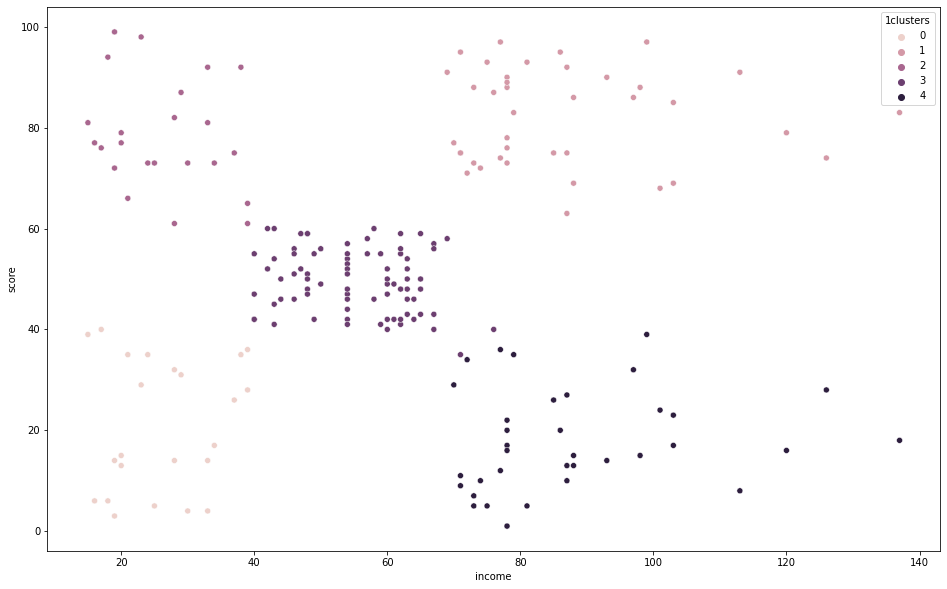

In [37]:
plt.figure(figsize=(16,10))
sns.scatterplot('income','score',hue='1clusters',data=df)
plt.show()

In [38]:
#agglomerative clustring

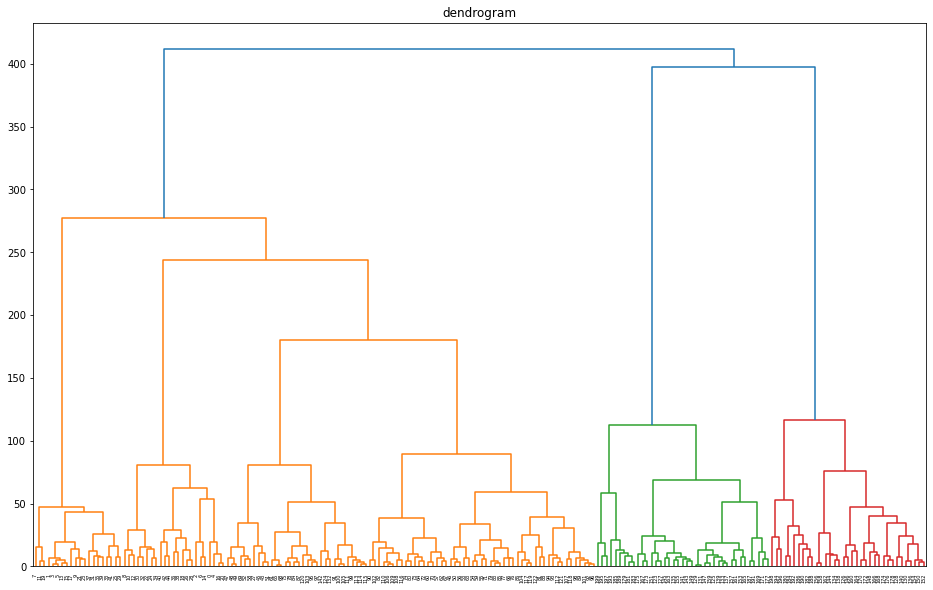

In [39]:
plt.figure(figsize=(16,10))
plt.title('dendrogram')
shc.dendrogram(shc.linkage(x,method='ward'))
plt.show()

In [44]:
ac=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [45]:
ac.fit(x)

AgglomerativeClustering(n_clusters=5)

In [46]:
labels=ac.labels_

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


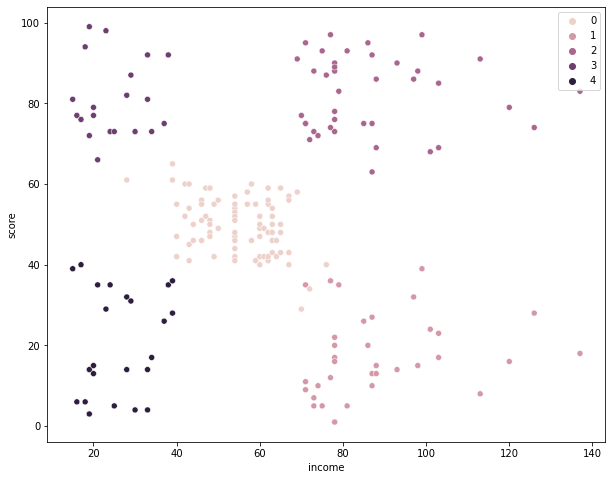

In [47]:
plt.figure(figsize=(10,8))
sns.scatterplot('income','score',hue=labels,data=df)
plt.show()